## Prediction Model

## Final Project Submission

Please fill out:
* __Student name:__ Kristine Petrosyan
* __Student pace:__ part time
* __Scheduled project review date/time:__ TBD
* __Instructor name:__ Victor

## Problem Statement

The goal of this project is to build a machine learning model to accurately predict whether customer will cancel bookings or no.

# Begin Study

> We will use Machine Learning Algorithms to __build the prediction model__.   Will use the hotel booking dataset from Kaggle. The aim is to build a model to predict bookings cancellation likelihood.

In [1]:
import datetime
start = datetime.datetime.now()

### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 

import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc, classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

#### Import Functions

In [5]:
#Print Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def print_metrics(labels, preds, TN, TP, FN, FP, numObsv):
    '''
    Purpose: Print Performance Metrics
    '''
    print(f'Precision Score: {precision_score(labels, preds)}')
    print(f'Specificity: {TN / (TN+FP)}')  # True Negative Rate
    print(f'Recall Score: {recall_score(labels, preds)}')  # True Positive Rate
    print(f'Accuracy Score: {accuracy_score(labels, preds)}')
    print(f'F1 Score: {f1_score(labels, preds)}')
    print(f'Misclassification Rate: {(1 - accuracy_score(labels, preds))}')
    print(f'_________ \n')

    print(f'Among {numObsv} observations our model is predicting {TP+FP} canceled. \nIn actual,  {TP+FN} have canceled and among those, the model identified {TP} correctly.\n')

    print(f'True  Positive: {TP}.  The model has predicted the positive (1) case, correctly.')
    print(f'True  Negative: {TN}.  The model has predicted the negative case (0), correctly.')
    print(f'False Positive: {FP}.  The model has predicted these customers would cancel, but in actual they do not cancel -- Type I Error.')
    print(f'False Negative: {FN}.  The model has predicted these customers will not cancel, but in actual they do cancel -- Type II Error.')

    print(f'*_Accuracy Score:  {(TP+TN)/(TP+FP+TN+FN)} is the accuracy of the predicton model.')
    print(f'*_Precision Score: {TP/(TP+FP)} is the measure of the accuracy of the model in predicting that a customer will cancel the booking.')
    print(f'Sensitivity (Recall) Score: {TP/(TP+FN)} of the cancellations are correctly identified as been canceled -- True Postive Rate.')
    print(f'Specificity Score:          {TN/(TN+FP)} of the successful bookings are correctly identified as not been canceled -- True Negative Rate.')

### Load Dataset


In [6]:
data = pd.read_csv('../input/hotel-booking-cleaned/hotel_booking_cleaned.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,No Deposit,304.0,0,Transient,75.0,0,0,2015-07-02
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-03
2,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,303.0,0,Transient,103.0,0,1,2015-07-03
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,No Deposit,240.0,0,Transient,82.0,0,1,2015-05-06
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,No Deposit,15.0,0,Transient,105.5,0,0,2015-04-22


In [7]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
74549,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,No Deposit,394.0,0,Transient,96.14,0,0,2017-09-06
74550,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,No Deposit,9.0,0,Transient,225.43,0,2,2017-09-07
74551,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,No Deposit,9.0,0,Transient,157.71,0,4,2017-09-07
74552,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,89.0,0,Transient,104.40,0,0,2017-09-07
74553,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,No Deposit,9.0,0,Transient,151.20,0,2,2017-09-07


In [8]:
data.shape

(74554, 29)

# EDA
> Analysis performed in __Capstone_EDA__  jupyter notebook.

# Data Cleaning
> Analysis performed in __Capstone_ML_Model - (Baseline and FeatEngr)__  jupyter notebook.

#### Copy Raw Dataset

In [9]:
# Copy raw dataset to new dataframe for furter processing
df = data.copy()

#### Change Data type

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74554 entries, 0 to 74553
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           74554 non-null  object        
 1   is_canceled                     74554 non-null  int64         
 2   lead_time                       74554 non-null  int64         
 3   arrival_date_year               74554 non-null  int64         
 4   arrival_date_month              74554 non-null  object        
 5   arrival_date_week_number        74554 non-null  int64         
 6   arrival_date_day_of_month       74554 non-null  int64         
 7   stays_in_weekend_nights         74554 non-null  int64         
 8   stays_in_week_nights            74554 non-null  int64         
 9   adults                          74554 non-null  int64         
 10  children                        74554 non-null  float64       
 11  ba

In [12]:
# Check for null values in the data
df.isnull().any().any()

False

# Feature Engineering

#### One-hot Encoding

In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,304.0,0,75.0,0,0,2015-07-02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,240.0,0,98.

In [14]:
df.shape

(74554, 238)

In [15]:
list(df.columns)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'hotel_Resort Hotel',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS

#### Observations: Feature Engineering 
- Implemented one-hot-encoding (ohe) on 11 categorical columns in the dataset.

#### Evaluate correlation with vaiables

In [16]:
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                    1.000000
required_car_parking_spaces    0.182192
market_segment_Online TA       0.178064
lead_time                      0.173112
country_PRT                    0.165000
                                 ...   
country_ETH                    0.000459
country_PRI                    0.000459
country_HRV                    0.000376
country_ECU                    0.000334
country_BIH                    0.000005
Name: is_canceled, Length: 237, dtype: float64

# Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 15):

- lead_time                        0.116716
- deposit_type_Non Refund          0.108665
- country_PRT                      0.080293
- adr                              0.078294
- total_of_special_requests        0.069174
- arrival_date_day_of_month        0.056989
- agent                            0.051549
- arrival_date_week_number         0.048732
- stays_in_week_nights             0.037315
- previous_cancellations           0.030105
- stays_in_weekend_nights          0.025514
- arrival_date_year                0.024081
- required_car_parking_spaces      0.020868
- market_segment_Online TA         0.020407
- customer_type_Transient          0.019232

In [17]:
# Most Predictive Features
import_feats = [
'lead_time',
'deposit_type_Non Refund',
'country_PRT',
'adr',
'total_of_special_requests',
'arrival_date_day_of_month',
'agent',
'arrival_date_week_number',
'stays_in_week_nights',
'previous_cancellations',
'stays_in_weekend_nights',
'arrival_date_year',
'required_car_parking_spaces',
'market_segment_Online TA',
'customer_type_Transient']

# Create Train, Test Splits

#### Create X,y variables

In [18]:
# Create X, y vars for further processing
y = df['is_canceled']
X = df.loc[:,import_feats]

In [19]:
X.tail()

,lead_time,deposit_type_Non Refund,country_PRT,adr,total_of_special_requests,arrival_date_day_of_month,agent,arrival_date_week_number,stays_in_week_nights,previous_cancellations,stays_in_weekend_nights,arrival_date_year,required_car_parking_spaces,market_segment_Online TA,customer_type_Transient
74549,23,0,0,96.14,0,30,394.0,35,5,0,2,2017,0,0,1
74550,102,0,0,225.43,2,31,9.0,35,5,0,2,2017,0,1,1
74551,34,0,0,157.71,4,31,9.0,35,5,0,2,2017,0,1,1
74552,109,0,0,104.40,0,31,89.0,35,5,0,2,2017,0,1,1
74553,205,0,0,151.20,2,29,9.0,35,7,0,2,2017,0,1,1


In [82]:
y.tail()

74549    0
74550    0
74551    0
74552    0
74553    0
Name: is_canceled, dtype: int64

#### Create train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [21]:
#y_train.fillna(y_train.mean())


In [84]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(59643, 15) (59643,) (14911, 15) (14911,)


### Re-run Algorithm(s) - Determine Best Performing Model

In [22]:
#Print Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def print_metrics(labels, preds, TN, TP, FN, FP, numObsv):
    '''
    Purpose: Print Performance Metrics
    '''
    print(f'Precision Score: {precision_score(labels, preds)}')
    print(f'Specificity: {TN / (TN+FP)}')  # True Negative Rate
    print(f'Recall Score: {recall_score(labels, preds)}')  # True Positive Rate
    print(f'Accuracy Score: {accuracy_score(labels, preds)}')
    print(f'F1 Score: {f1_score(labels, preds)}')
    print(f'Misclassification Rate: {(1 - accuracy_score(labels, preds))}')
    print(f'_________ \n')

    print(f'Among {numObsv} observations our model is predicting {TP+FP} canceled. \nIn actual,  {TP+FN} have canceled and among those, the model identified {TP} correctly.\n')

    print(f'True  Positive: {TP}.  The model has predicted the positive (1) case, correctly.')
    print(f'True  Negative: {TN}.  The model has predicted the negative case (0), correctly.')
    print(f'False Positive: {FP}.  The model has predicted these customers would cancel, but in actual they do not cancel -- Type I Error.')
    print(f'False Negative: {FN}.  The model has predicted these customers will not cancel, but in actual they do cancel -- Type II Error.')

    print(f'*_Accuracy Score:  {(TP+TN)/(TP+FP+TN+FN)} is the accuracy of the predicton model.')
    print(f'*_Precision Score: {TP/(TP+FP)} is the measure of the accuracy of the model in predicting that a customer will cancel the booking.')
    print(f'Sensitivity (Recall) Score: {TP/(TP+FN)} of the cancellations are correctly identified as been canceled -- True Postive Rate.')
    print(f'Specificity Score:          {TN/(TN+FP)} of the successful bookings are correctly identified as not been canceled -- True Negative Rate.')

LogRegress	 Test Accuracy Score: 0.761854 	 Train Accuracy Score: 0.759284

Null Accuracy:
0    0.697405
Name: is_canceled, dtype: float64

cohen_kappa_score: 
 0.3777051069858738 

matthews_corrcoef: 
 0.3912219198129872 

*_roc_auc_score: 
 0.6712353406696906 

The classifier made a total of 14911 predictions.

The classifier predicted guests booked the hotel 11886 times, and canceled 3025 times.
Actually, 10399 guests booked the hotel and 4512 guests canceled.
_________ 

Confusion Matrix Metrics: TP = 1993 | TN = 9367 | FP = 1032 | FN = 2519 


[[9367 1032]
 [2519 1993]]

Number of Type I Errors: 1032
Number of Type II Errors: 2519


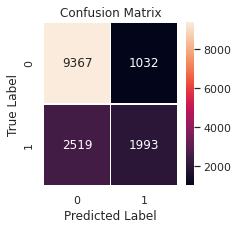

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.79      0.90      0.84     10399
    is_canceled (1)       0.66      0.44      0.53      4512

           accuracy                           0.76     14911
          macro avg       0.72      0.67      0.68     14911
       weighted avg       0.75      0.76      0.75     14911


Precision Score: 0.6588429752066116
Specificity: 0.9007596884315799
Recall Score: 0.4417109929078014
Accuracy Score: 0.7618536650794715
F1 Score: 0.5288576356640573
Misclassification Rate: 0.2381463349205285
_________ 

Among 14911 observations our model is predicting 3025 canceled. 
In actual,  4512 have canceled and among those, the model identified 1993 correctly.

True  Positive: 1993.  The model has predicted the positive (1) case, correctly.
True  Negative: 9367.  The model has predicted the negative case (0), correctly.
False Positive: 1032.  The model has predicted these customers would canc

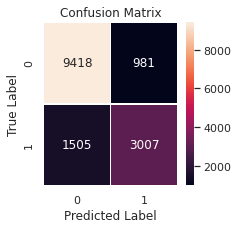

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.86      0.91      0.88     10399
    is_canceled (1)       0.75      0.67      0.71      4512

           accuracy                           0.83     14911
          macro avg       0.81      0.79      0.80     14911
       weighted avg       0.83      0.83      0.83     14911


Precision Score: 0.754012036108325
Specificity: 0.9056640061544379
Recall Score: 0.6664450354609929
Accuracy Score: 0.833277446180672
F1 Score: 0.707529411764706
Misclassification Rate: 0.166722553819328
_________ 

Among 14911 observations our model is predicting 3988 canceled. 
In actual,  4512 have canceled and among those, the model identified 3007 correctly.

True  Positive: 3007.  The model has predicted the positive (1) case, correctly.
True  Negative: 9418.  The model has predicted the negative case (0), correctly.
False Positive: 981.  The model has predicted these customers would cancel, b

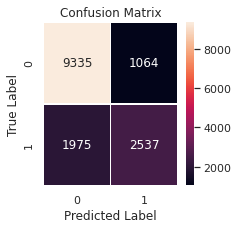

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.83      0.90      0.86     10399
    is_canceled (1)       0.70      0.56      0.63      4512

           accuracy                           0.80     14911
          macro avg       0.76      0.73      0.74     14911
       weighted avg       0.79      0.80      0.79     14911


Precision Score: 0.704526520410997
Specificity: 0.8976824694682181
Recall Score: 0.5622783687943262
Accuracy Score: 0.7961907316746026
F1 Score: 0.6254159990139283
Misclassification Rate: 0.20380926832539736
_________ 

Among 14911 observations our model is predicting 3601 canceled. 
In actual,  4512 have canceled and among those, the model identified 2537 correctly.

True  Positive: 2537.  The model has predicted the positive (1) case, correctly.
True  Negative: 9335.  The model has predicted the negative case (0), correctly.
False Positive: 1064.  The model has predicted these customers would canc

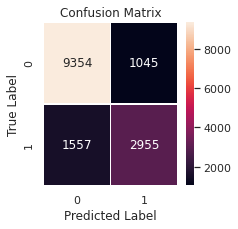

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.86      0.90      0.88     10399
    is_canceled (1)       0.74      0.65      0.69      4512

           accuracy                           0.83     14911
          macro avg       0.80      0.78      0.79     14911
       weighted avg       0.82      0.83      0.82     14911


Precision Score: 0.73875
Specificity: 0.8995095682277142
Recall Score: 0.6549202127659575
Accuracy Score: 0.8254979545302126
F1 Score: 0.6943139097744361
Misclassification Rate: 0.17450204546978743
_________ 

Among 14911 observations our model is predicting 4000 canceled. 
In actual,  4512 have canceled and among those, the model identified 2955 correctly.

True  Positive: 2955.  The model has predicted the positive (1) case, correctly.
True  Negative: 9354.  The model has predicted the negative case (0), correctly.
False Positive: 1045.  The model has predicted these customers would cancel, but in

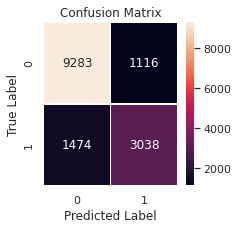

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.86      0.89      0.88     10399
    is_canceled (1)       0.73      0.67      0.70      4512

           accuracy                           0.83     14911
          macro avg       0.80      0.78      0.79     14911
       weighted avg       0.82      0.83      0.82     14911


Precision Score: 0.7313432835820896
Specificity: 0.892681988652755
Recall Score: 0.6733156028368794
Accuracy Score: 0.826302729528536
F1 Score: 0.7011308562197093
Misclassification Rate: 0.173697270471464
_________ 

Among 14911 observations our model is predicting 4154 canceled. 
In actual,  4512 have canceled and among those, the model identified 3038 correctly.

True  Positive: 3038.  The model has predicted the positive (1) case, correctly.
True  Negative: 9283.  The model has predicted the negative case (0), correctly.
False Positive: 1116.  The model has predicted these customers would cancel,

In [23]:
# Re-run models to determine the best performing model

import os
import sys
import pickle

pipe_logRegr = Pipeline([('rs', RobustScaler()),
        ('clf', LogisticRegression())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        #('clf', RandomForestClassifier(random_state = 42))])
         ('clf', RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=1000, n_jobs=-1, random_state = 42))])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier(random_state = 42))])

pipe_gb = Pipeline([('rs', RobustScaler()),
        #('clf', GradientBoostingClassifier(random_state = 42))])
        ('clf', GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000, random_state = 42))])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier(random_state = 42))])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
scoring_results = []

# Loop to fit each of the pipelines in the named list
for index, pipe in enumerate(pipelines):
    
    pipe.fit(X_train, y_train)
    
    # Fit using grid search
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
  

    # Pickle training object
   
    outfile = pipeline_names[index]+'.pickle'
    picklefile = open(str(outfile), 'wb')
    pickle.dump(model, picklefile)
    picklefile.close()
    
    # Compare Test and Train Accuracy Scores
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(pipe.score(X_test, y_test),6)} \t Train Accuracy Score: {round(pipe.score(X_train, y_train),6)}\n')
    scoring_results.append(round(pipe.score(X_test, y_test),6))
    
    # Null Accuracy
    y_test.value_counts()/len(y_test)
    print(f'Null Accuracy:\n{y_test.value_counts().head(1)/len(y_test)}\n')
    
    # cohen_kappa_score
    print(f'cohen_kappa_score: \n {cohen_kappa_score(y_test, y_pred)} \n')
    
    # matthews_corrcoef
    print(f'matthews_corrcoef: \n {matthews_corrcoef(y_test, y_pred)} \n')
    
    # roc_auc_score
    print(f'*_roc_auc_score: \n {roc_auc_score(y_test, y_pred)} \n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1,1]  # True Positives
    TN = cm[0,0]  # True Negatives
    FP = cm[0,1]  # False Positves - Type I Errors
    FN = cm[1,0]  # False Negatives - Type II Errors
    num_pred = len(y_pred)
    
    print(f'The classifier made a total of {num_pred} predictions.\n')
    print(f'The classifier predicted guests booked the hotel {TN+FN} times, and canceled {TP+FP} times.')
    print(f'Actually, {TN+FP} guests booked the hotel and {TP+FN} guests canceled.')
    print(f'_________ \n')
    print(f'Confusion Matrix Metrics: TP = {TP} | TN = {TN} | FP = {FP} | FN = {FN} \n')
    print(f'\n{cm}\n')  # Print confusion matrix
    print(f'Number of Type I Errors: {FP}')
    print(f'Number of Type II Errors: {FN}')
    
    f, ax = plt.subplots(figsize =(3,3))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    target_names = ['is_not_canceled (0)', 'is_canceled (1)'] 
    print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
    print_metrics(y_test, y_pred, TN, TP, FN, FP, num_pred)
    print(f'################################################################################# \n')

final_scoring_results = list(zip(pipeline_names, scoring_results))
final_scoring_results = pd.DataFrame(final_scoring_results, columns=['Classifier','Acc Score (test)'])

In [1]:
pwd

'/kaggle/working'

#### Observations: Determine Best Performing Model


In [24]:
final_scoring_results = pd.DataFrame(final_scoring_results)
final_scoring_results.columns = ['Classifier','Acc Score (test)']
final_scoring_results

,Classifier,Acc Score (test)
0,LogRegress,0.761854
1,RandomForestClf,0.833277
2,AdaBoostClf,0.796191
3,GradBoostClf,0.825498
4,XGBClassifier,0.826303


> __RandomForestClf__ model worked the best out of all of our models giving the highest accuracy scores:
- RandomForestClf:	 __Test Accuracy Score: 0.833277 	 Train Accuracy Score: 0.926161__
- False Negatives (__Type II__) have higher counts than those of other miss-classifications.

# Test Single Prediction

## De-Pickle Best Performing Model 
> Use for single prediction testing

In [26]:
# De-pickle the best performing model for testing
import pickle
clf_file = open('./RandomForestClf.pickle', 'rb')
model = pickle.load(clf_file)
clf_file.close()

In [27]:
X_train.head(10)

,lead_time,deposit_type_Non Refund,country_PRT,adr,total_of_special_requests,arrival_date_day_of_month,agent,arrival_date_week_number,stays_in_week_nights,previous_cancellations,stays_in_weekend_nights,arrival_date_year,required_car_parking_spaces,market_segment_Online TA,customer_type_Transient
41296,166,0,0,99.00,1,8,9.0,19,1,0,1,2017,0,1,1
30756,8,0,1,55.00,0,1,159.0,10,3,0,0,2016,0,0,0
33280,37,0,0,131.40,0,4,9.0,23,1,0,1,2016,0,1,1
50475,82,0,0,119.85,1,7,14.0,15,3,0,2,2016,0,0,1
50920,95,0,0,74.00,0,20,35.0,17,2,0,0,2016,0,0,0
54979,135,0,0,92.28,2,15,7.0,29,2,0,2,2016,0,1,1
52727,14,0,0,87.12,0,31,11.0,23,3,0,0,2016,0,1,1
12009,5,0,1,54.40,0,5,240.0,49,1,0,2,2015,0,1,1
59003,1,0,0,215.00,0,30,14.0,40,2,0,1,2016,0,0,1
68764,62,0,0,153.00,2,14,9.0,20,2,0,2,2017,0,1,1


In [28]:
y_train.head(10)

41296    1
30756    1
33280    1
50475    0
50920    0
54979    0
52727    0
12009    0
59003    0
68764    0
Name: is_canceled, dtype: int64

#### In Sample Testing - rowid 96734

In [29]:
# 1- Test Single Prediction based on rowid- 96734
y_single_pred_ex = model.predict([[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]) 
display(y_single_pred_ex)

# Test Single Prediction Probability
y_single_pred_prob_ex = model.predict_proba([[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]) 
display(y_single_pred_prob_ex)


array([0])

array([[0.99210613, 0.00789387]])

#### Out of Sample Testing

In [30]:
# 1- Test Single Prediction - Out of Sample
y_single_pred = model.predict([[365,0,0,185.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred)

# Test Single Prediction Probability
y_single_pred_prob = model.predict_proba([[365,0,0,185.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred_prob)

array([0])

array([[0.70705185, 0.29294815]])

In [ ]:
# 2 - Test Single Prediction - Out of Sample
y_single_pred_ex = model.predict([[220,0,1,85.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred_ex)

# Test Single Prediction Probability
y_single_pred_prob_ex = model.predict_proba([[220,0,1,85.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred_prob_ex)


#### Testing Notes

In [ ]:
# TESTING NOTES:_RandomForestClf

# Toggle value (0 or 1) for Country_PRT - 3rd variable and increase lead_time > 220 -- to test predictions.
# [[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # rowid- 96734   label- [0].
# [[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # rowid- 96734 # label- [0]  [0.99403579, 0.00596421]
# [[220,0,1,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # label- [1]  [0.38587653, 0.61412347]
# [[365,0,0,185.00,0,26,28.0,21,2,0,1,2017,0,0,1]]  # label- [1]  [0.75960365, 0.24039635]]

In [ ]:
# TESTING NOTES:_ XGBoostClf

# Toggle value (0 or 1) for Country_PRT - 3rd variable and increase lead_time > 220 -- to test predictions.
# [[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # rowid- 96734   label- [0].
# [[220,0,1,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # label- [1]  [0.46080166, 0.53919834]
# [[360,0,1,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # label- [1]  [0.32303786, 0.67696214]]

# Conclusions

####  Best Performance  Model
> __RandomForestClf__ 

__Null Accuracy:__ 0    0.607762

__cohen_kappa_score:__ 0.7402866615753101 

__matthews_corrcoef:__ 0.7414900702010119 

__roc_auc_score:__ 0.8656552631067826 (**)

The classifier made a total of __30869__ predictions.

The classifier predicted guests booked the hotel __19589__ times, and canceled __11280__ times.
Actually, __18761__ guests booked the hotel and 12108 guests canceled.

[[17287  1474]

 [ 2302  9806]]

Confusion Matrix Metrics: TP = 9806 | TN = 17287 | FP = 1474 | FN = 2302 

Number of Type I Errors: 1474
Number of Type II Errors: 2302

Classification Report:

                      precision    recall  f1-score   support

    is_not_canceled (0)   0.88      0.92      0.90     18761
    
    is_canceled     (1)   0.87      0.81      0.84     12108

          micro avg       0.88      0.88      0.88     30869
          macro avg       0.88      0.87      0.87     30869
       weighted avg       0.88      0.88      0.88     30869


- __Accuracy Score:__ 0.8776766335158249   (**)
- __Precision Score:__ 0.8693262411347518  (**)
- __Specificity:__ 0.9214327594477907
- __Recall Score:__ 0.8098777667657747
- __F1 Score:__ 0.8385496835984266
- __Misclassification Rate:__ 0.12232336648417508
_________ 

Among 30869 observations our model is predicting 11280 canceled. In actual, only 12108 have canceled and among those, the model ONLY identified 9806 correctly.

- True  Positive: 9806.  The model has predicted the positive (is_canceled) case, correctly.
- True  Negative: 17287.  The model has predicted the negative case (is_not_canceled), correctly.
- False Positive: 1474.  The model has predicted these customers would cancel, but in actual they do not cancel.
    -  __Type I Error__
- False Negative: 2302.  The model has predicted these customers will not cancel, but in actual they do cancel. 
    - __Type II Error__

- __Accuracy Score:__  0.8776766335158249 is the accuracy of the prediction model.
- __Precision Score:__ 0.8693262411347518 is the measure of the accuracy of the model in predicting that a customer will cancel the booking.
- __Sensitivity (Recall) Score:__ 0.8098777667657747 of the cancellations are correctly identified as been canceled. 
    - (True Positive Rate) – Improving hotel managements' ability to predict with __81%__ accuracy - overbooking situations and potential for negative feedback on social channels impacting the hotels' reputation.
- __Specificity Score:__ 0.9214327594477907 of the successful bookings are correctly identified as not been canceled.
    - (True Negative Rate) – Improving hotel managements' ability to predict with __92%__ accuracy - hotel revenue loss and staffing requirements/allocation.

#### Summary of Results

This classification study evaluated the following __(9)__ alogrithms to predict bookings cancellation likelihood:
- GaussianNB	 
- LogRegress	 
- LinearDiscr	 
- KNeighborsClf	 
- DecisionTreeClf	 
- RandomForestClf	 
- AdaBoostClf	 
- GradBoostClf	 
- XGBClassifier	 

- __RandomForestClf__ model worked the "best" out of all of our models giving the highest accuracy score for Test Accuracy Score: 0.877677 | Train Accuracy Score: 0.939452.
- __GaussianNB__ model was the "least" successful model with a basline  score for Train Accuracy Score (mean): 0.530191 (std): +/- 0.007457.

#### The Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 15):

- lead_time                        0.116716
- deposit_type_Non Refund          0.108665
- country_PRT                      0.080293
- adr                              0.078294
- total_of_special_requests        0.069174
- arrival_date_day_of_month        0.056989
- agent                            0.051549
- arrival_date_week_number         0.048732
- stays_in_week_nights             0.037315
- previous_cancellations           0.030105
- stays_in_weekend_nights          0.025514
- arrival_date_year                0.024081
- required_car_parking_spaces      0.020868
- market_segment_Online TA         0.020407
- customer_type_Transient          0.019232

#### Classifier Error Rate Matrix

In [31]:
# Classifier Error Rate Matrix
final_scoring_results['Test Error Rate (Pct)'] = (1 - final_scoring_results['Acc Score (test)']) * 100 
final_scoring_results.sort_values('Test Error Rate (Pct)')

,Classifier,Acc Score (test),Test Error Rate (Pct)
1,RandomForestClf,0.833277,16.6723
4,XGBClassifier,0.826303,17.3697
3,GradBoostClf,0.825498,17.4502
2,AdaBoostClf,0.796191,20.3809
0,LogRegress,0.761854,23.8146


> __RandomForestClf__  | has the lowest percent prediction error when evaluating against the test data set:	__12.2323%__

# __Final Summary__

> __RandomForestClf__ 
- __Test Accuracy Score: 0.877677  |   Train Accuracy Score: 0.939452__
- __Accuracy Score:__ 0.833277  
- __Precision Score:__ 0.8693262411347518  
- __roc_auc_score:__ 0.8656552631067826 

- __AUC - ROC__ curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. In this case, it can __distinguish between the is_canceled class by 87%__.  ROC_AUC Score: 87% is the ROC is a probability curve and AUC represents degree or measure of separability. ... By analogy, Higher the AUC, better the model is at distinguishing between cancellations being canceled or not canceled. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.


- False Positive: 1474.  The model has predicted these customers would cancel, but in actual they do not cancel.
    -  __Type I Error__ , are less than the Type II Errors, however, these errors if not addressed properly, the hotel could experience __Overbooking Situations__ and __Negative On-line Social Comments__ both impacting the hotel's reputation.


- False Negative: 2302.  The model has predicted these customers will not cancel, but in actual they do cancel. 
    - __Type II Error__, have the most miss-classified errors.  If not addressed properly, the hotel could experience __Revenue Loss__, thinking that the reservation is booked, when in fact these reservations end up canceling.  In this case, the hotel is not prepared to anticipate these cancellations. 


- __Accuracy Score:  0.8776766335158249__ is the accuracy of the prediction model.


- __Precision Score: 0.8693262411347518__ is the measure of the accuracy of the model in predicting that a customer will cancel the booking.


- __Sensitivity (Recall) Score: 0.8098777667657747__ of the cancellations are correctly identified as been canceled.
    - __True Positive Rate__, indicates that the model is correctly predicting hotel cancellations __80%__ of the time.
    - Improving hotel managements' ability to predict with __81%__ accuracy - overbooking situations and potential for negative feedback on social channels impacting the hotels' reputation.

- __Specificity Score:          0.9214327594477907__ of the successful bookings are correctly identified as not been canceled.
    - __True Negative Rate__, indicates that the model is correctly predicting hotel successful bookings __92%__ of the time.
    - Improving hotel managements' ability to predict with __92%__ accuracy - hotel revenue loss and staffing requirements/allocation.

# Future Work

- Consider, further evaluation to address the following:

    - Include additional features such as, weather, events, holidays, updated values for company (company has 112592, 94.3% missing values), and inventory metrics from neighboring hotels.
    - Modeling lead time categories vs. lead time as a continuous variable, to determine if any of categories are important features.
    - Imputing the rows with unknown values for attributes vs. removing the rows.
    - Removal of duplicate rows which accounted for 31% of the rows.  Here is where domain knowledge would have been beneficial.

# Notes | Machine Learning  Metrics

#### Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

- __True Positives (TP)__– True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- __True Negatives (TN)__ – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- __False Positives (FP)__ – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- __False Negatives (FN)__ – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.


- So, for the first question of how precisely test is pointing out positive, the measure:

__Precision = TP/(TP+FP)__

- Second question, how precise test is at pointing out negatives, the measure:

__Specificity = TN / (TN+FP)__

__"Sensitivity" or "Recall"__
True Positive Rate: When it's actually yes, how often does it predict yes?

__"Specificity"__
True Negative Rate: When it's actually no, how often does it predict no?



__A couple other terms are also worth mentioning:__

- __Null Error Rate:__ Accuracy that could be achieved by always predicting the most frequent class.

- __Cohen's Kappa:__ This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. 

- __F Score:__ This is a weighted average of the true positive rate (recall) and precision. 

- __ROC Curve:__ This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.   
    -  In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered ...

#### Tuning Notes

__Gradient Boost:__
    
The three most important parameters to tune are:
- Number of trees
- Tree depth
- Step Size (learning rate)

A terse configuration strategy for new problems:

- Run the default configuration (and presumably review learning curves?).
- If the system is overlearning, slow the learning down (using shrinkage?).
- If the system is underlearning, speed the learning up to be more aggressive (using shrinkage?).

Tips for configuring gradient boosting:

- learning rate + number of trees: Target 500-to-1000 trees and tune learning rate.
- number of samples in leaf: the number of observations needed to get a good mean estimate.
- interaction depth: 10+.

In [ ]:
end = datetime.datetime.now()
elapsed_time = end - start
print(f'Capstone_ML_Model Total Execution Time: {elapsed_time}')

# End Study